# Exploratory Analysis For Online News Popularity - A deep insight analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Reading the data


In [2]:
#quickly explore and get a sense of the contents
df = pd.read_csv('OnlineNewsPopularity.csv')
#return the first few rows of the DataFrame
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [3]:
df.tail()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.5,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.4,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.8,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.5,-0.012500,0.000000,0.000000,0.500000,0.000000,1100
39643,http://mashable.com/2014/12/27/youtube-channel...,8.0,10.0,157.0,0.701987,1.0,0.846154,1.0,1.0,0.0,...,0.100000,0.50,-0.200000,-0.2,-0.200000,0.333333,0.250000,0.166667,0.250000,1300


# Data Processing

In [4]:
#Displays
#the names of the columns,
#the data types they contain 
#any missing values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [5]:
#number of rows followed by the number of columns
df.shape

(39644, 61)

In [6]:
#summary statistics for numerical columns 
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [7]:
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [8]:
#Removing Space Character from Feature names
df.columns=df.columns.str.replace(" ","")

In [9]:
 df['weekday_is_monday']

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
39639    0.0
39640    0.0
39641    0.0
39642    0.0
39643    0.0
Name: weekday_is_monday, Length: 39644, dtype: float64

In [10]:
# Here we drop the two non-preditive (url and timedelta) attributes. They won't contribute anything
df.drop(labels=['url','timedelta'], axis = 1, inplace=True)


In [11]:

df['shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

In [12]:
df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [13]:
df['Shares_category']=pd.cut(df.iloc[:,-1],bins=[0,946,1400,2800,843300], labels=['Low','Medium','High','Excellent'])

In [14]:
# Merging the weekdays columns channels as one single column
publishdayMerge=df[['weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday','weekday_is_saturday' ,'weekday_is_sunday' ]]
temp_arr=[]
for r in list(range(publishdayMerge.shape[0])):
    for c in list(range(publishdayMerge.shape[1])):
        if ((c==0) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Monday')
        elif ((c==1) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Tueday')
        elif ((c==2) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Wednesday')
        elif ((c==3) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Thursday')
        elif ((c==4) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Friday')
        elif ((c==5) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Saturday') 
        elif ((c==6) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Sunday')

In [15]:
# Merging the data channels as one single column
DataChannelMerge=df[['data_channel_is_lifestyle','data_channel_is_entertainment' ,'data_channel_is_bus',
                        'data_channel_is_socmed' ,'data_channel_is_tech','data_channel_is_world' ]]
#logic to merge data channel
DataChannel_arr=[]
for r in list(range(DataChannelMerge.shape[0])):
    if (((DataChannelMerge.iloc[r,0])==0) and ((DataChannelMerge.iloc[r,1])==0) and ((DataChannelMerge.iloc[r,2])==0) and ((DataChannelMerge.iloc[r,3])==0) and ((DataChannelMerge.iloc[r,4])==0) and ((DataChannelMerge.iloc[r,5])==0)):
        DataChannel_arr.append('Others')
    for c in list(range(DataChannelMerge.shape[1])):
        if ((c==0) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Lifestyle')
        elif ((c==1) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Entertainment')
        elif ((c==2) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Business')
        elif ((c==3) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Social Media')
        elif ((c==4) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Tech')
        elif ((c==5) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('World')

In [16]:
# merge the the new data into the dataframe

df.insert(loc=11, column='weekdays', value=temp_arr)
df.insert(loc=12, column='data_channel', value=DataChannel_arr)



In [17]:
df.drop(labels=['data_channel_is_lifestyle','data_channel_is_entertainment' ,'data_channel_is_bus',
                        'data_channel_is_socmed' ,'data_channel_is_tech','data_channel_is_world', 
                 'weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday', 
                      'weekday_is_thursday', 'weekday_is_friday','weekday_is_saturday' ,'weekday_is_sunday'], axis = 1, inplace=True)

In [18]:
df.shape

(39644, 49)

In [19]:
df.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'weekdays', 'data_channel', 'kw_min_min', 'kw_max_min',
       'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg',
       'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess', 'is_weekend',
       'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'ab

<AxesSubplot:xlabel='Shares_category', ylabel='count'>

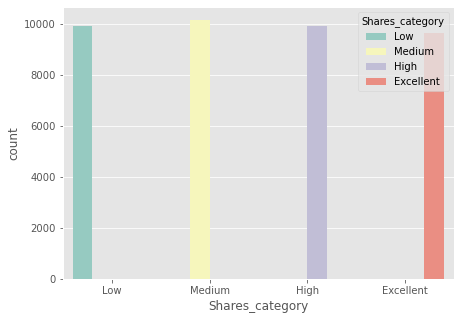

In [20]:
plt.figure(figsize=(7,5))
sns.countplot(x='Shares_category',hue="Shares_category",data=df,palette="Set3")

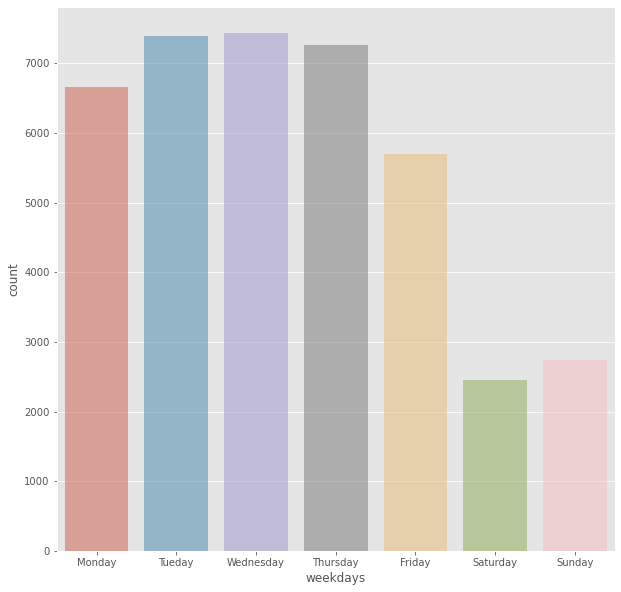

In [21]:
# shows the days when articles are usually posted
fig, axes = plt.subplots(figsize=(10,10))
ax = sns.countplot(x='weekdays',data=df,alpha=0.5, ax=axes)

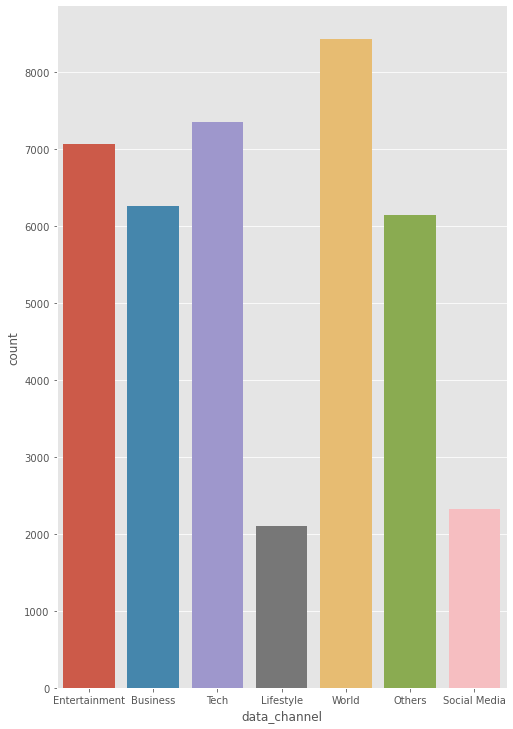

In [22]:
# Shows the distribution of the articles across the channels
sns.catplot(x='data_channel', data=df, kind="count", height=10, aspect=.7)

<AxesSubplot:xlabel='Shares_category', ylabel='num_imgs'>

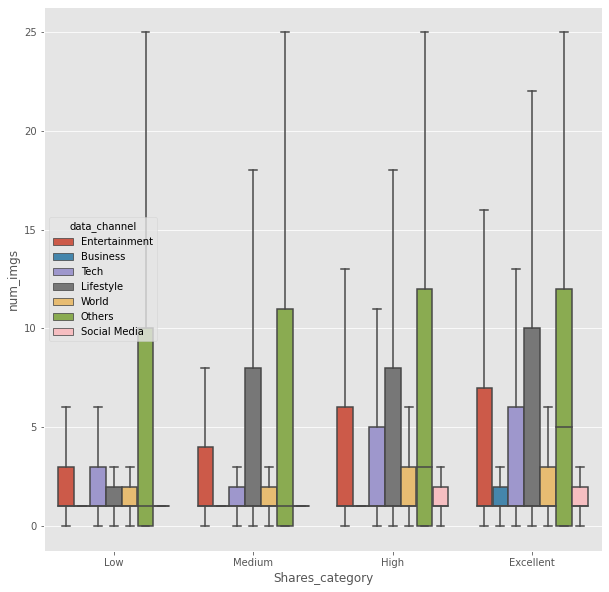

In [23]:
fig,ax = plt.subplots(figsize=(10,10))
temp_data = df[df['num_imgs'] <= 25]
sns.boxplot(x='Shares_category',y='num_imgs', hue='data_channel', data=temp_data, showfliers=False)

In [24]:
# Drop these items or rows with n_tokens_content = 0

df = df[df['n_tokens_content'] != 0]

In [25]:
df['n_non_stop_unique_tokens']

0        0.815385
1        0.791946
2        0.663866
3        0.665635
4        0.540890
           ...   
39639    0.684783
39640    0.885057
39641    0.644128
39642    0.692661
39643    0.846154
Name: n_non_stop_unique_tokens, Length: 38463, dtype: float64

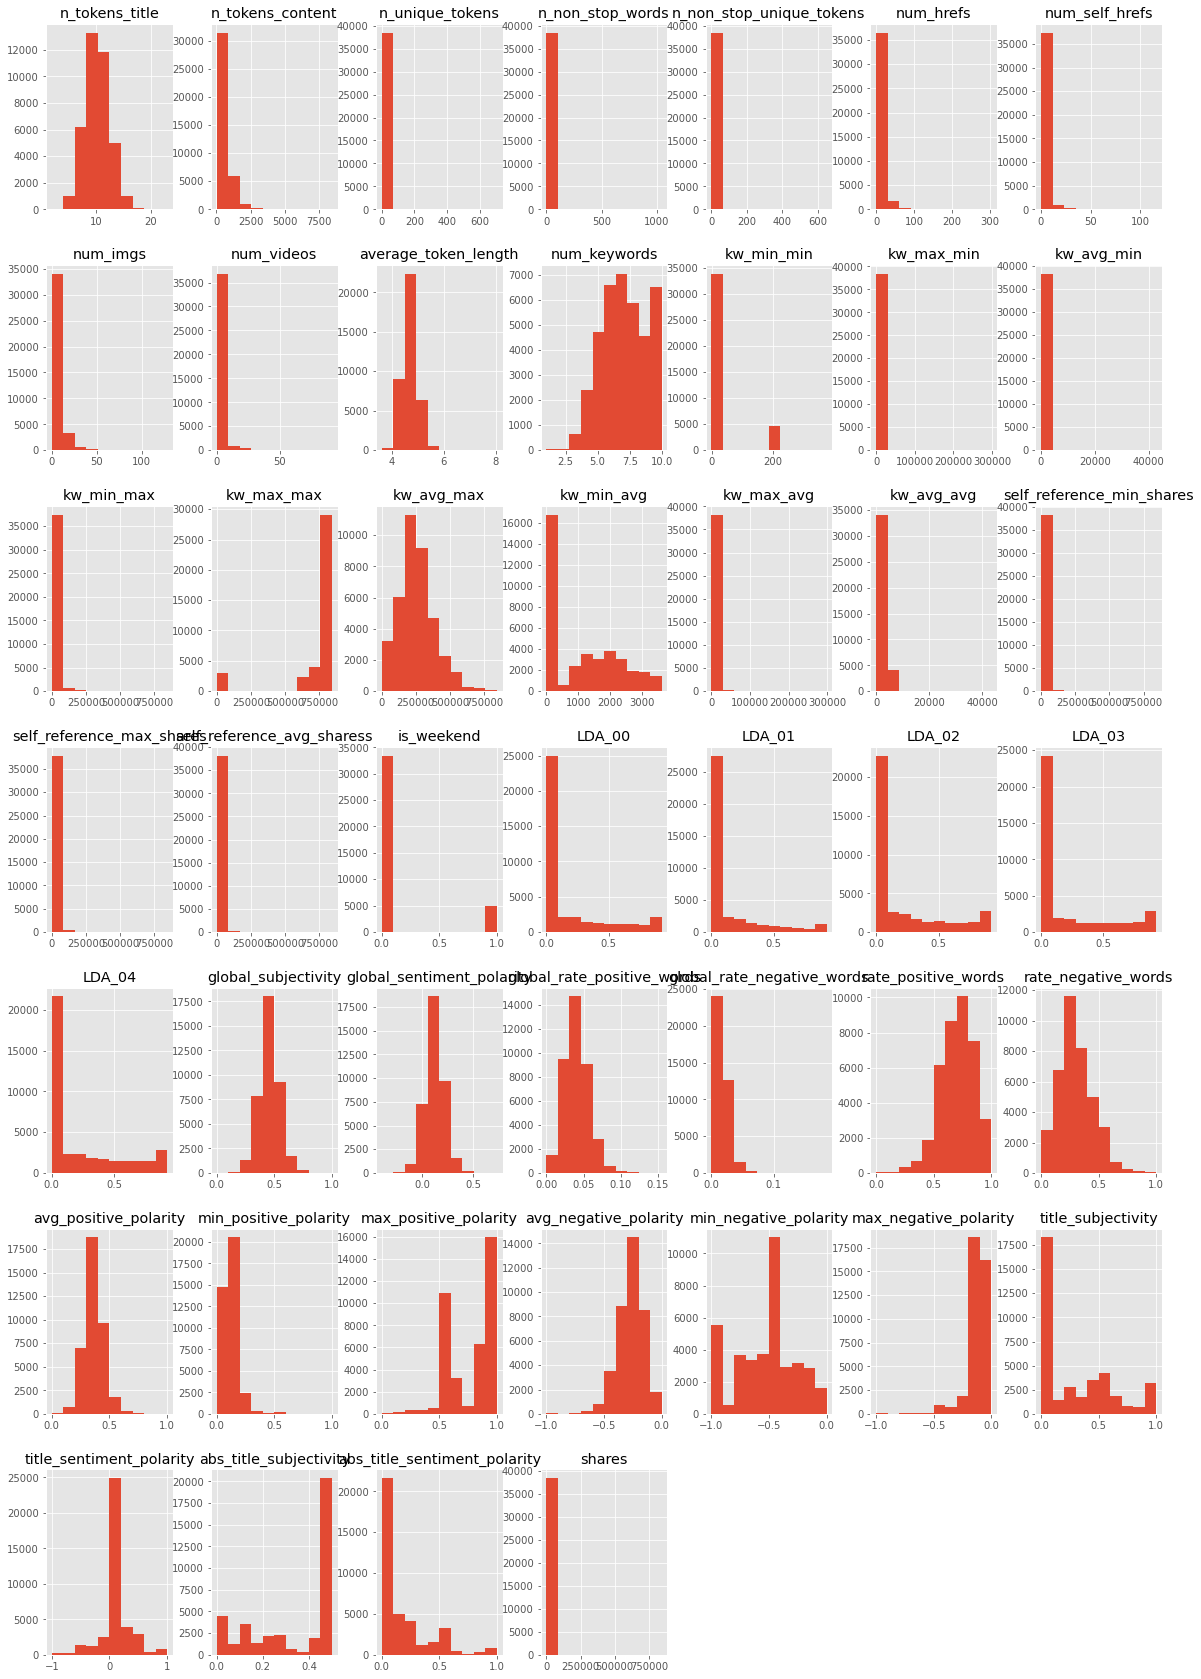

In [26]:
df.hist(figsize=(20,30))
plt.show()

<AxesSubplot:>

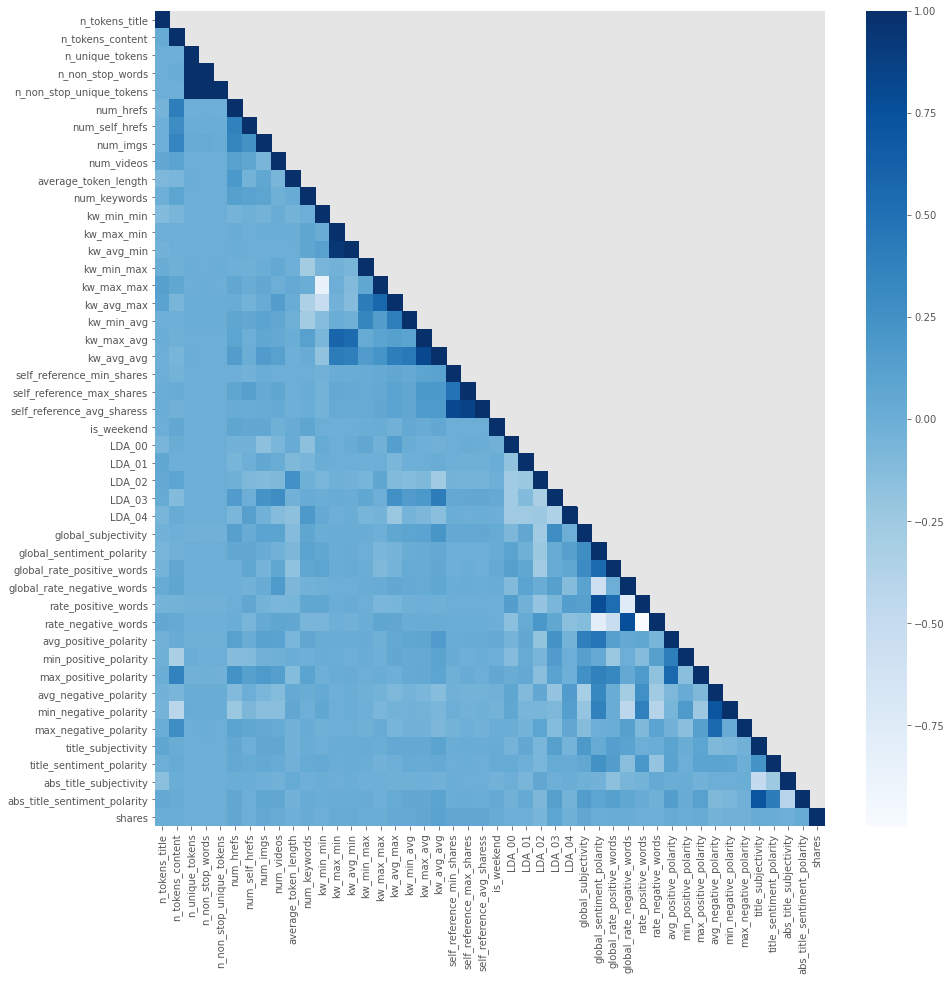

In [27]:
cor=df.corr()
#ns.heatmap(cor)
plt.figure(figsize=(15,15))
df_lt = cor.where(np.tril(np.ones(cor.shape)).astype(np.bool))
sns.heatmap(df_lt,cmap='Blues')

In [28]:
# n_tokens_content represents Number of words in the content
# However its minimum value to be 0. Means that there are articles that do not have any content.
# Such records should be dropped as their related attributes add no meaning to our analysis

# find number of rows that contain 0 for n_tokens_content
num_of_nowords=df[df['n_tokens_content']==0].index
print('number of news items with no words',num_of_nowords.size)

number of news items with no words 0


In [29]:
df['weekdays']=df['weekdays'].astype('str')
df['data_channel']=df['data_channel'].astype('str')


<ipython-input-29-6a01d9f58c67>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weekdays']=df['weekdays'].astype('str')
<ipython-input-29-6a01d9f58c67>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['data_channel']=df['data_channel'].astype('str')


In [30]:
from sklearn.preprocessing  import LabelEncoder
le=LabelEncoder()

In [31]:
df['weekdays'] = le.fit_transform(df.weekdays.values)
df['data_channel'] = le.fit_transform(df.data_channel.values)

<ipython-input-31-0193aa9d5b5e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weekdays'] = le.fit_transform(df.weekdays.values)
<ipython-input-31-0193aa9d5b5e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['data_channel'] = le.fit_transform(df.data_channel.values)


In [32]:
X=df.iloc[:,:-2]
Y=df.iloc[:,-1]

In [33]:
Y=le.fit_transform(Y)

In [ ]:
# for i,num in zip(df, range(1, 60)):
#     plt.subplot(30, 2, num)
#     df.boxplot(column=[i], vert = False)
#     plt.figure(figsize=(15,15))

In [58]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif



fvalue_selector = SelectKBest(f_classif, k=10)
X_kbest = fvalue_selector.fit_transform(X, Y)

print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_kbest.shape[1])

mask = fvalue_selector.get_support() #list of booleans
selectedFeatures = [] # The list of your K best features

for bool, feature in zip(mask, X.columns.values):
    if bool:
        selectedFeatures.append(feature)

print(selectedFeatures)

Original number of features: 21
Reduced number of features: 10
['num_hrefs', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'is_weekend', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity']


In [84]:
selectedFeatures[1:4]

['kw_min_avg', 'kw_max_avg', 'kw_avg_avg']

<Figure size 1440x1440 with 0 Axes>

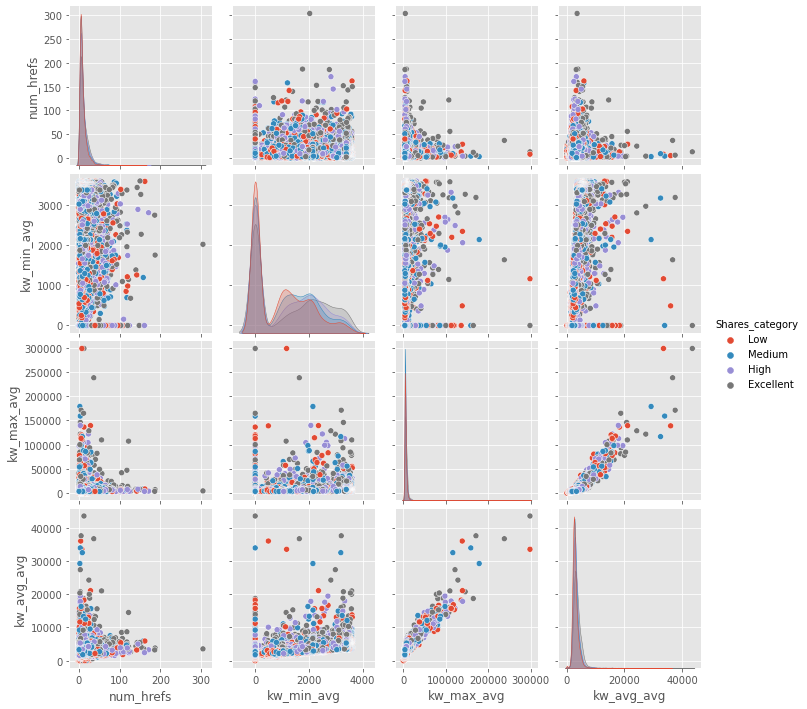

In [60]:
plt.figure(figsize=(20,20))
sns.pairplot(df, hue='Shares_category', vars = selectedFeatures[:4])

In [61]:
X = df[selectedFeatures]


In [62]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[1.31578947e-02, 2.76698667e-04, 0.00000000e+00, ...,
        4.45344234e-02, 4.32732325e-02, 5.21617145e-01],
       [9.86842105e-03, 2.76698667e-04, 0.00000000e+00, ...,
        5.40732290e-02, 5.39271005e-02, 3.41245791e-01],
       [9.86842105e-03, 2.76698667e-04, 0.00000000e+00, ...,
        3.59766006e-02, 7.35758257e-01, 7.02222222e-01],
       ...,
       [7.89473684e-02, 4.85573608e-01, 2.30586027e-02, ...,
        6.94840863e-01, 1.58511061e-01, 5.10295815e-01],
       [3.28947368e-02, 2.76698667e-04, 1.13415445e-02, ...,
        4.31739243e-02, 4.31448954e-02, 3.58577613e-01],
       [3.28947368e-03, 8.40079442e-01, 1.21096279e-02, ...,
        5.46755412e-02, 5.39270213e-02, 5.17893218e-01]])

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scale, Y, test_size=0.3, random_state=101)

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [65]:
rfc = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=3000,
                       n_jobs=None, oob_score=False)

#Fitting the model
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=3000)

In [79]:
y_pred = rfc.predict(X_test)

In [80]:
score = rfc.score(X_test, y_test)
print(score)

0.25452812202097236


In [81]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2359  171  221   68]
 [2340  247  248   66]
 [2173  338  247  121]
 [2226  326  304   84]]
              precision    recall  f1-score   support

           0       0.26      0.84      0.40      2819
           1       0.23      0.09      0.12      2901
           2       0.24      0.09      0.13      2879
           3       0.25      0.03      0.05      2940

    accuracy                           0.25     11539
   macro avg       0.24      0.26      0.17     11539
weighted avg       0.24      0.25      0.17     11539



In [69]:
from sklearn.svm import SVC

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.35, random_state = 101)

In [71]:
svc = SVC( kernel='rbf')

svc.fit(X_train,y_train)

SVC()

In [72]:
y_pred = svc.predict(X_test)

In [73]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1482  212  739  831]
 [1040  188 1095 1064]
 [ 768  127 1535  930]
 [ 834  160 1325 1133]]
              precision    recall  f1-score   support

           0       0.36      0.45      0.40      3264
           1       0.27      0.06      0.09      3387
           2       0.33      0.46      0.38      3360
           3       0.29      0.33      0.31      3452

    accuracy                           0.32     13463
   macro avg       0.31      0.32      0.30     13463
weighted avg       0.31      0.32      0.29     13463



In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)

In [75]:
# Fitting classifier to the Training set

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(algorithm='auto', leaf_size=30, 
                           metric='minkowski',metric_params=None, 
                           n_jobs=None, n_neighbors=9, p=2,
                           weights='uniform')
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [76]:
y_pred = classifier.predict(X_test)

In [77]:

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1203  679  503  434]
 [ 941  811  578  571]
 [ 641  695  977  566]
 [ 751  774  821  594]]
              precision    recall  f1-score   support

           0       0.34      0.43      0.38      2819
           1       0.27      0.28      0.28      2901
           2       0.34      0.34      0.34      2879
           3       0.27      0.20      0.23      2940

    accuracy                           0.31     11539
   macro avg       0.31      0.31      0.31     11539
weighted avg       0.31      0.31      0.31     11539



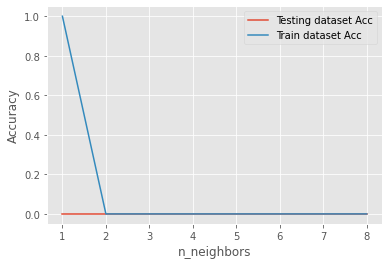

In [78]:
neighbors=np.arange(1,9)
Train_Accuracy=np.arange(1,9)
Test_Accuracy=np.arange(1,9)
for i,n in enumerate(neighbors):
    KNN =KNeighborsClassifier(n_neighbors=n)
    KNN.fit(X_train, y_train)
    Train_Accuracy[i]=KNN.score(X_train,y_train)
    Test_Accuracy[i]=KNN.score(X_test,y_test)
plt.plot(neighbors,Test_Accuracy,label='Testing dataset Acc')
plt.plot(neighbors,Train_Accuracy,label='Train dataset Acc')
plt.legend()
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.show()
